# Data-601: 
# Final Project: Classification Problem over IMDb Movies Dataset

# Load the Libraries

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
import graphviz
import matplotlib.pylab as py
import statsmodels.api as sm

In [ ]:
%matplotlib notebook

# Read in the data

In [ ]:
movies = pd.read_csv("./movies_with_weights_100.csv",error_bad_lines=False)
movies_df = movies[['success_flag','year','actor_weight','director_weight','writer_weight','producer_weight','genre_weight','production_co_weight']]

Check the size of our data.

In [ ]:
movies_df.shape

(5697, 8)

Look at the first few entries of our data.

In [ ]:
movies_df.head(5)

,success_flag,year,actor_weight,director_weight,writer_weight,producer_weight,genre_weight,production_co_weight
0,0,1988,0.069978,0.572521,0.000000,NaN,0.250008,0.000000
1,0,1996,-0.775114,NaN,-0.517782,-0.356898,0.437505,0.268094
2,0,2004,-0.131206,0.000000,0.093459,0.000000,0.500000,0.517869
3,0,2007,-0.256889,-0.511849,NaN,-0.715322,0.293145,0.000000
4,1,1980,0.394147,0.000000,NaN,0.000000,0.000000,0.333300


In [ ]:
# Name the Features (Predictors)
feature_names=list(movies_df.columns.values[2:])
feature_names

['actor_weight',
 'director_weight',
 'writer_weight',
 'producer_weight',
 'genre_weight',
 'production_co_weight']

In [ ]:
# Check the Data Types
movies_df.dtypes

success_flag              int64
year                      int64
actor_weight            float64
director_weight         float64
writer_weight           float64
producer_weight         float64
genre_weight            float64
production_co_weight    float64
dtype: object

### Are There Missing Data?

In [ ]:
movies_df.isnull().any()

success_flag            False
year                    False
actor_weight             True
director_weight          True
writer_weight            True
producer_weight          True
genre_weight            False
production_co_weight    False
dtype: bool

#### Drop Remaining Missing Data

In [ ]:
movies_analysis_df = movies_df.dropna()
movies_analysis_df.shape

(4056, 8)

In [ ]:
movies_analysis_df.isnull().any()

success_flag            False
year                    False
actor_weight            False
director_weight         False
writer_weight           False
producer_weight         False
genre_weight            False
production_co_weight    False
dtype: bool

### Check the Distribution of the Data

In [ ]:
class_0, class_1 = 0, 0
  
class_0 = ((movies_df[['success_flag']]) == 0).sum()
class_1 = ((movies_df[['success_flag']]) == 1).sum()

print("Class has", int(class_0), "zero values and", int(class_1), "one values.")

Class has 3279 zero values and 2418 one values.


------------------------

# Hold Out a Test Set (To be Used Later)
Before going much further with our analysis, let's hold out a test set for later.  All of the training and testing should be implemented on the remaining data and the hold out will be used afterwards to check for final accuracy of our model.

In [ ]:
# Create a Dataframe with the 2019 and 2020 Data
hold_out_test_df = movies_analysis_df[movies_analysis_df["year"] > 2018] 
  
# Create a Dataframe with the Remaining Data  
movies_analysis_train_test_df = movies_analysis_df[movies_analysis_df["year"] < 2019]

In [ ]:
# Check the Sizes of the New Dataframes
print("Hold Out Data Shape: ", hold_out_test_df.shape)
print("Remaining Data Shape: ", movies_analysis_train_test_df.shape)

Hold Out Data Shape:  (113, 8)
Remaining Data Shape:  (3943, 8)


#### Drop the Year Column

In [ ]:
hold_out_test_df = hold_out_test_df.drop(["year"], axis=1)
movies_analysis_train_test_df = movies_analysis_train_test_df.drop(["year"], axis=1)

In [ ]:
# Check the Final Sizes of the New Dataframes
print("Hold Out Data Final Shape: ", hold_out_test_df.shape)
print("Remaining Data Final Shape: ", movies_analysis_train_test_df.shape)

Hold Out Data Final Shape:  (113, 7)
Remaining Data Final Shape:  (3943, 7)


--------------------------------

# Review Training/Test Dataset

### Review the Scatterplot Matrix

<IPython.core.display.Javascript object>


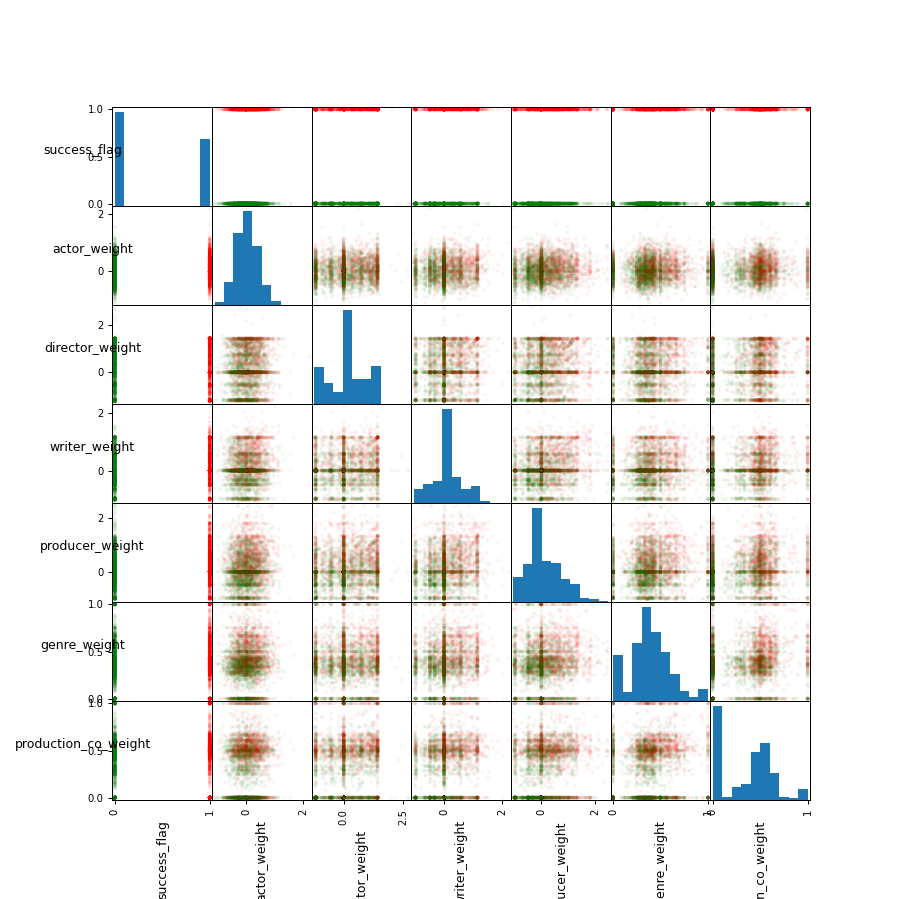

In [ ]:
# Build Scatter Plot Matrix
colors = ['green', 'red']
scatter_matrix = pd.plotting.scatter_matrix(movies_analysis_train_test_df, alpha=0.05, figsize=(10,10), 
                                c=movies_analysis_train_test_df.success_flag.apply(lambda x:colors[x]));
[s.xaxis.label.set_rotation(90) for s in scatter_matrix.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in scatter_matrix.reshape(-1)]
py.show()

#### Split Data in to Training and Testing 

In [ ]:
dat = movies_analysis_train_test_df.copy()

x_full = dat.values[:,1:]
y_full = dat.values[:,0]

x_train,x_test,y_train,y_test=train_test_split(
    x_full,y_full,
    test_size=0.33,
    random_state=123)

In [ ]:
# Check the Sizes of the New Dataframes
print("Training Data Shape: ", x_train.shape)
print("Testing Data Shape: ", x_test.shape)

Training Data Shape:  (2641, 6)
Testing Data Shape:  (1302, 6)


# Classification Tree Model

<IPython.core.display.Javascript object>


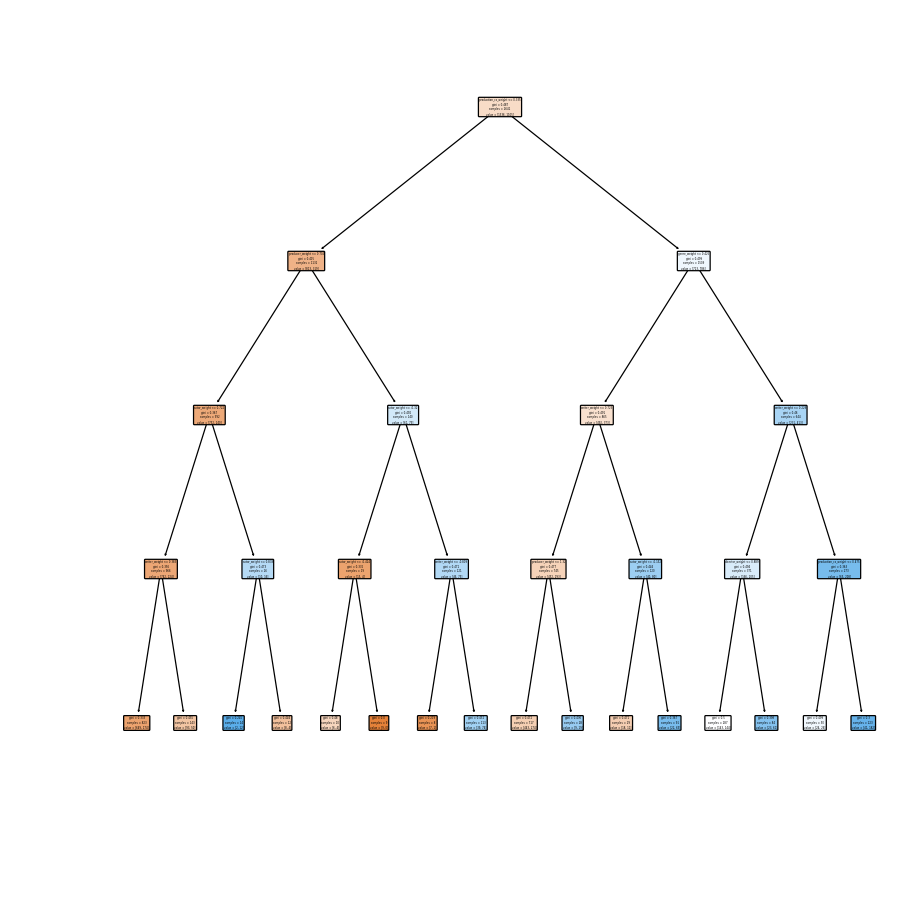

[Text(387.5, 693.0, 'production_co_weight <= 0.335\ngini = 0.487\nsamples = 2641\nvalue = [1536, 1105]'),
 Text(193.75, 539.0, 'producer_weight <= 0.705\ngini = 0.405\nsamples = 1132\nvalue = [813, 319]'),
 Text(96.875, 385.0, 'actor_weight <= 0.722\ngini = 0.367\nsamples = 992\nvalue = [752, 240]'),
 Text(48.4375, 231.0, 'writer_weight <= 0.383\ngini = 0.356\nsamples = 966\nvalue = [742, 224]'),
 Text(24.21875, 77.0, 'gini = 0.333\nsamples = 823\nvalue = [649, 174]'),
 Text(72.65625, 77.0, 'gini = 0.455\nsamples = 143\nvalue = [93, 50]'),
 Text(145.3125, 231.0, 'actor_weight <= 0.838\ngini = 0.473\nsamples = 26\nvalue = [10, 16]'),
 Text(121.09375, 77.0, 'gini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(169.53125, 77.0, 'gini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(290.625, 385.0, 'actor_weight <= -0.32\ngini = 0.492\nsamples = 140\nvalue = [61, 79]'),
 Text(242.1875, 231.0, 'actor_weight <= -0.424\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(217.96875, 77.0, 'gini

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 123, max_depth = 4)
clf_gini.fit(x_train,y_train)
py.figure(figsize=(10,10))
tree.plot_tree(clf_gini, feature_names=feature_names, filled=True, rounded=True)


### Apply to the Test Data

In [ ]:
y_pred=clf_gini.predict(x_test)
print(f"Predicted values: {y_pred}")

Predicted values: [0. 0. 0. ... 0. 1. 0.]


#### Confusion Matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[598 164]
 [282 258]]


#### Accuracy 

In [ ]:
print(accuracy_score(y_test,y_pred)*100)

65.74500768049155


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.78      0.73       762
         1.0       0.61      0.48      0.54       540

    accuracy                           0.66      1302
   macro avg       0.65      0.63      0.63      1302
weighted avg       0.65      0.66      0.65      1302



# Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

### Apply to Test Data

In [ ]:
logreg_predict=logreg.predict(x_test)
logistic_cm=confusion_matrix(y_test, logreg_predict)

#### Confusion Matrix

In [ ]:
print(logistic_cm)

[[616 146]
 [299 241]]


#### Accuracy

In [ ]:
print(accuracy_score(y_test,logreg_predict)*100)

65.82181259600614


In [ ]:
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.653170
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.039     
Dependent Variable: y                AIC:              3462.0449 
Date:               2020-12-20 09:26 BIC:              3497.3184 
No. Observations:   2641             Log-Likelihood:   -1725.0   
Df Model:           5                LL-Null:          -1795.3   
Df Residuals:       2635             LLR p-value:      1.3971e-28
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.4795      0.1084     4.4239    0.0000     0.2671     0.6919
x2     0.1306      0.0523     2.4960    0.0126     0.0

### Model Only Based on Statistically Significant Predictors

In [ ]:
x_5_predictors = movies_analysis_df.values[:,[1,3,4,5,6]]
y_5_predictors = movies_analysis_df.values[:,0]

x_5_predictors_train, x_5_predictors_test, y_5_predictors_train, y_5_predictors_test = train_test_split(
    x_5_predictors,y_5_predictors,
    test_size=0.33,
    random_state=123)

In [ ]:
logreg2 = LogisticRegression()
logreg2.fit(x_5_predictors_train, y_5_predictors_train)

LogisticRegression()

#### Apply to Test Data

In [ ]:
logreg2_predict = logreg2.predict(x_5_predictors_test)
logistic_cm2 = confusion_matrix(y_5_predictors_test, logreg2_predict)

#### Confusion Matrix

In [ ]:
print(logistic_cm2)

[[634 144]
 [321 240]]


#### Accuracy

In [ ]:
print(accuracy_score(y_5_predictors_test,logreg2_predict)*100)

65.27259148618371


# Fit a Logistic Regression Model on the Union of Training and Testing Data

In [ ]:
logreg_best = LogisticRegression()
logreg_best.fit(x_full, y_full)

LogisticRegression()

In [ ]:
logit_best_model = sm.Logit(y_full,x_full)
result_best = logit_best_model.fit()
print(result_best.summary2())

Optimization terminated successfully.
         Current function value: 0.654136
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.037     
Dependent Variable: y                AIC:              5170.5162 
Date:               2020-12-20 09:27 BIC:              5208.1943 
No. Observations:   3943             Log-Likelihood:   -2579.3   
Df Model:           5                LL-Null:          -2678.8   
Df Residuals:       3937             LLR p-value:      4.6501e-41
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.4926      0.0888     5.5489    0.0000     0.3186     0.6666
x2     0.0995      0.0427     2.3311    0.0198     0.0

### Apply to Hold Out Data

In [ ]:
hold_out_dat = hold_out_test_df.copy()

# Split Into x and y Values
hold_out_x = hold_out_dat.values[:,1:]
hold_out_y = hold_out_dat.values[:,0]

In [ ]:
logreg_best_predict = logreg_best.predict(hold_out_x)
logistic_best_cm = confusion_matrix(hold_out_y, logreg_best_predict)

#### Confusion Matrix

In [ ]:
print(logistic_best_cm)

[[28 17]
 [22 46]]


#### Accuracy

In [ ]:
print(accuracy_score(hold_out_y,logreg_best_predict)*100)

65.48672566371681


### Final Model Only Based on Statistically Significant Predictors

In [ ]:
x_full_5_predictors = dat.values[:,[1,3,4,5,6]]
y_full_5_predictors = dat.values[:,0]

hold_out_x_5_predictors = hold_out_dat.values[:,[1,3,4,5,6]]
hold_out_y_5_predictors = hold_out_dat.values[:,0]

In [ ]:
logreg2_best = LogisticRegression()
logreg2_best.fit(x_full_5_predictors, y_full_5_predictors)

LogisticRegression()

#### Apply to Hold Out Data

In [ ]:
logreg2_best_predict = logreg2_best.predict(hold_out_x_5_predictors)
logistic_best_cm2 = confusion_matrix(hold_out_y_5_predictors, logreg2_best_predict)

#### Confusion Matrix

In [ ]:
print(logistic_best_cm2)

[[25 20]
 [23 45]]


#### Accuracy

In [ ]:
print(accuracy_score(hold_out_y_5_predictors,logreg2_best_predict)*100)

61.94690265486725
